In [3]:
import graspologic as gp
import matplotlib.pyplot as plt
import numpy as np
from graspologic.embed import AdjacencySpectralEmbed, OmnibusEmbed
from graspologic.plot import heatmap
from graspologic.simulations import p_from_latent, sample_edges

In [4]:
from pkg.inference.vertex_position_test import vertex_position_test

In [61]:
def compute_delta(p, eps):
    delta = ((p + eps) ** 2 - p**2) / p

    return delta

def sample_latent(n, p, eps, seed=None):
    ps = np.repeat(p, n).reshape(-1, 1)
    X = np.sqrt(ps)

    delta = compute_delta(p, eps)
    delta_vec = np.zeros((n, 1))
    delta_vec[0, 0] += delta

    Y = np.sqrt(ps + delta_vec)

    return X, Y


def sample_graphs(n, p, eps, seed=None):
    X, Y = sample_latent(n=n, p=p, eps=eps, seed=seed)

    P_X = gp.simulations.p_from_latent(X)
    P_Y = gp.simulations.p_from_latent(Y)

    np.random.seed(seed)
    A = gp.simulations.sample_edges(P_X)
    B = gp.simulations.sample_edges(P_Y)

    return A, B

In [6]:
p = 0.25
eps = 3
n = 25

In [9]:
X = np.repeat(np.sqrt(p), n).reshape(-1, 1)
P_X = gp.simulations.p_from_latent(X, loops=True)

A = gp.simulations.sample_edges(P_X)

Y = np.repeat(p, n).reshape(-1, 1)
Y[0, 0] += 1 / np.sqrt(0.25)
Y = np.sqrt(Y)
P_Y = gp.simulations.p_from_latent(Y, Y, loops=True)

B = gp.simulations.sample_edges(P_Y)

In [28]:
stats, null1, null2 = vertex_position_test(A, B, n_components=2, n_bootstraps=10)

In [34]:
(stats <= null1).mean(axis=1)

array([0. , 0. , 0.3, 0.1, 0.1, 0. , 0.9, 0. , 0.3, 0.7, 0.1, 0.1, 0. ,
       0.1, 0.3, 0. , 0.2, 0.1, 0.2, 0.3, 0. , 0. , 1. , 0.1, 0.8])

In [33]:
(stats <= null2).mean(axis=1)

array([0. , 0.1, 0.5, 0.3, 0.2, 0.1, 1. , 0.1, 0.6, 0.7, 0. , 0.3, 0.1,
       0.2, 0.2, 0. , 0.2, 0.3, 0.3, 0.6, 0.1, 0.4, 0.9, 0.2, 1. ])

In [25]:
res

(array([[1.08592646],
        [1.23819776],
        [0.50268083],
        [0.68186108],
        [0.75424057],
        [0.70981027],
        [0.10757134],
        [1.44302925],
        [0.63841905],
        [0.43701447],
        [0.71786214],
        [0.53037363],
        [1.24223781],
        [0.49581513],
        [0.78747452],
        [0.69774538],
        [0.78207827],
        [1.13014465],
        [0.42221045],
        [0.32720892],
        [0.48952811],
        [0.71228932],
        [0.10285327],
        [0.55188964],
        [0.66793746]]),
 array([[0.2528289 , 0.49870691, 0.32718582, 0.84894284, 0.59270639,
         0.16404008, 0.59330663, 0.79079147, 0.53856319, 0.31317709],
        [0.28779841, 0.5179362 , 0.48685724, 0.67563371, 0.69005435,
         0.38910428, 0.36012764, 0.22852313, 1.00122476, 0.36295217],
        [1.17205671, 0.31645792, 0.41134709, 0.38488377, 0.46720902,
         0.17009708, 0.3163768 , 0.93767469, 0.54143958, 0.30539361],
        [0.51394481, 0.98994353

In [ ]:
0.25 + np.sqrt(0.25**2)

0.5

In [ ]:
0.25**2

0.0625

<AxesSubplot:>

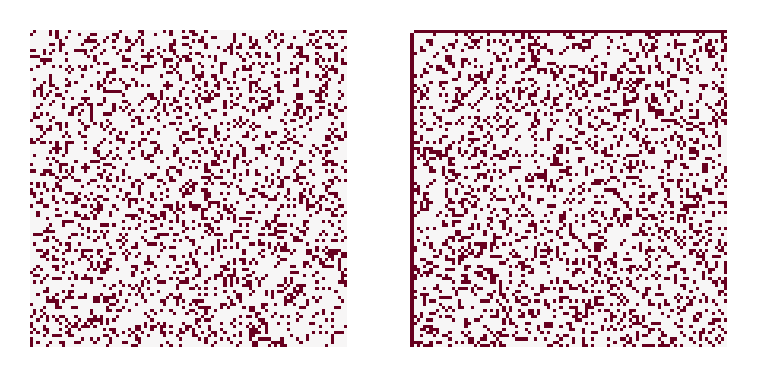

In [59]:
fig, ax = plt.subplots(ncols=2, figsize=(3, 3), dpi=300)


gp.plot.heatmap(A, cbar=False, ax=ax[0])
gp.plot.heatmap(B, cbar=False, ax=ax[1])